In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
TOKEN_SPAM_PROBE_FILE = 'C:/Users/amar/ML Projects/SpamData/03_Testing/prob_spam.txt'
TOKEN_HAM_PROB_FILE = 'C:/Users/amar/ML Projects/SpamData/03_Testing/prob_non_spam.txt'
TOKEN_ALL_PROB_FILE = 'C:/Users/amar/ML Projects/SpamData/03_Testing/prob_all_tokens.txt'

TEST_FEATURE_MATRIX = 'C:/Users/amar/ML Projects/SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'C:/Users/amar/ML Projects/SpamData/03_Testing/test-target.txt'



VOCAB_SIZE = 2500

## Load data

In [52]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')

#targets
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

#token probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROBE_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_token = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

### Calculating joint probability

In [53]:
X_test.shape

(2052, 2500)

In [54]:
prob_token_spam.shape

(2500,)

In [55]:

print('shape of the result dot product is :', X_test.dot(prob_token_spam).shape)

shape of the result dot product is : (2052,)


## Set the prior

$$ (Spam\, |\,X) = \frac{p(X\, | \, Spam\,) \, P(Spam)}{P(X)}$$

In [56]:
PROB_SPAM = 0.3116

In [57]:
np.log(prob_token_spam)

array([ -4.42130135,  -5.25871395,  -4.9151543 , ..., -12.10884012,
        -9.80625503,  -9.80625503])

In [58]:
X_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       ...,
       [2., 2., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 0., 0.]])

In [59]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_token)) + np.log(PROB_SPAM)

In [60]:
joint_log_spam

array([ 28.23091414,  22.95750683,  25.73436125, ..., -33.8483813 ,
       -16.56311573, -33.2909012 ])

### joint probability in log formate

In [61]:
X_test.dot(np.log(prob_token_spam)-np.log(prob_all_token))

array([ 29.39694911,  24.1235418 ,  26.90039621, ..., -32.68234634,
       -15.39708076, -32.12486623])

$$ (Spam\, |\,X) = \frac{p(X\, | \, Spam\,) \, (1- P(Spam))}{P(X)}$$

In [62]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_token)) + np.log(1 - PROB_SPAM)

In [63]:
joint_log_ham

array([-58.82232531, -36.26165954, -60.8292061 , ...,   5.39080843,
         3.35666328,   7.4835653 ])

In [64]:
joint_log_ham.size


2052

# Making Prdictions
## checking for higher joint probability

$$ P(Spam \, |\, X\,) > \, P(Ham\, | \, X)$$
<center>OR</center>
$$ P(Spam \, |\, X\,) < \, P(Ham\, | \, X)$$

In [65]:
prediction = joint_log_spam > joint_log_ham

In [66]:
prediction[-5:]

array([False, False, False, False, False])

In [67]:
prediction[-5:]*1

array([0, 0, 0, 0, 0])

In [68]:
## Simplify
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)


### Metrics and Evaluation

### Accuracy

In [69]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('classifided incorrectly', numdocs_wrong)

Docs classified correctly 2018
classifided incorrectly 34


In [70]:
#accuray 
correct_docs/len(X_test)

0.9834307992202729

In [71]:
fraction_wrong = numdocs_wrong / len(X_test)
print('fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('accuracy of model is {:.2%}'.format(1- fraction_wrong))

fraction classified incorrectly is 1.66%
accuracy of model is 98.34%


## visulizing the results

In [72]:
#chart styling info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

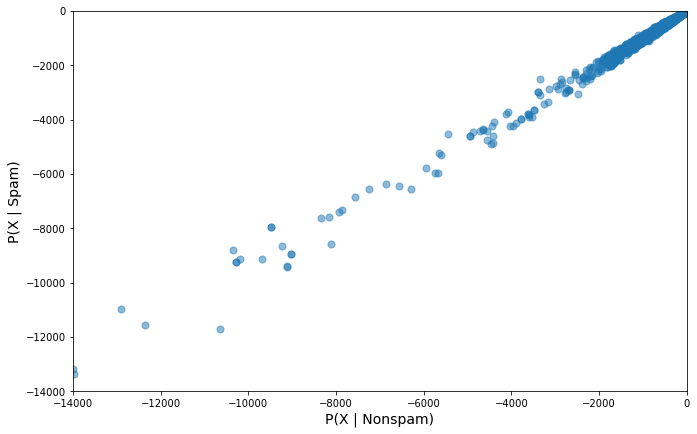

In [78]:
plt.figure(figsize=(11, 7))

plt.xlim(-14000, 1)
plt.ylim(-14000, 1)
plt.xlabel(xaxis_label, fontsize= 14)
plt.ylabel(yaxis_label, fontsize = 14)
plt.scatter(joint_log_ham, joint_log_spam, s = 50, alpha = 0.5)
plt.show()





## Decision boundary

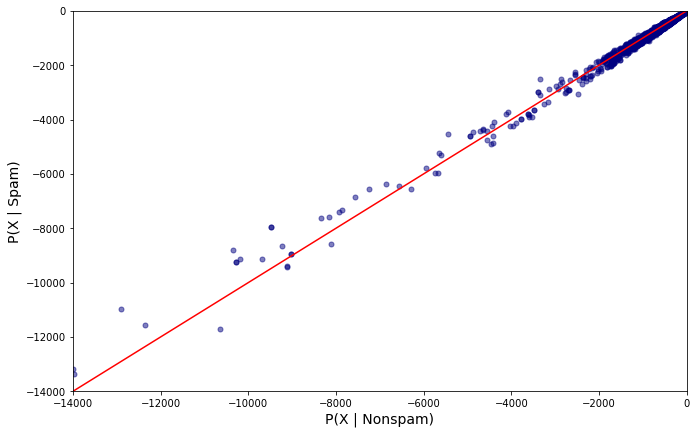

In [83]:
plt.figure(figsize=(11, 7))

plt.xlim(-14000, 1)
plt.ylim(-14000, 1)
plt.xlabel(xaxis_label, fontsize= 14)
plt.ylabel(yaxis_label, fontsize = 14)
plt.scatter(joint_log_ham, joint_log_spam, s = 25, alpha = 0.5, color= 'navy')
plt.plot(linedata, linedata, color = 'red')
plt.show()


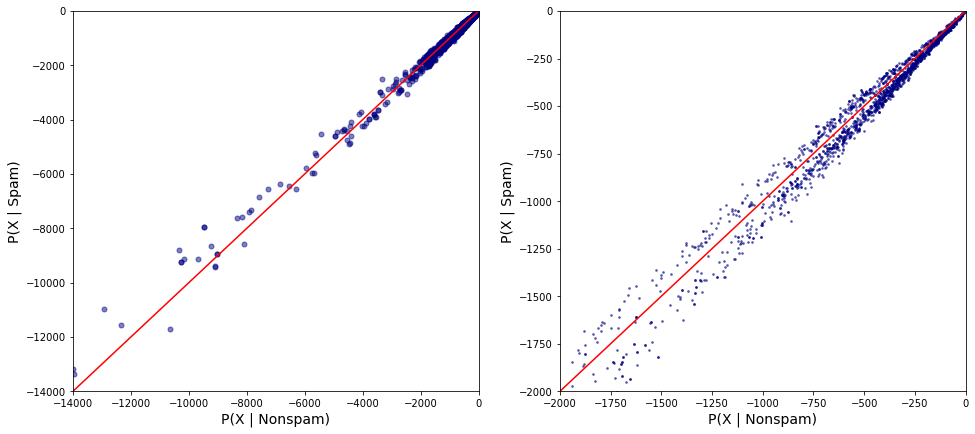

In [86]:
plt.figure(figsize=(16, 7))

#chart 1
plt.subplot(1, 2, 1)
plt.xlim(-14000, 1)
plt.ylim(-14000, 1)
plt.xlabel(xaxis_label, fontsize= 14)
plt.ylabel(yaxis_label, fontsize = 14)
plt.scatter(joint_log_ham, joint_log_spam, s = 25, alpha = 0.5, color= 'navy')
plt.plot(linedata, linedata, color = 'red')


#chart 1
plt.subplot(1, 2, 2)
plt.xlim(-2000, 1)
plt.ylim(-2000, 1)
plt.xlabel(xaxis_label, fontsize= 14)
plt.ylabel(yaxis_label, fontsize = 14)
plt.scatter(joint_log_ham, joint_log_spam, s = 3, alpha = 0.5, color= 'navy')
plt.plot(linedata, linedata, color = 'red')
plt.show()

In [87]:
#chart Styling

sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test} )


C:\Users\amar\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


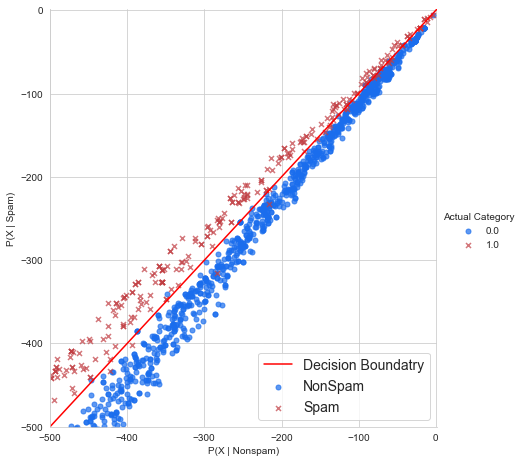

In [104]:
my_colors = ['#1A6DED', '#C13E43']

sns.lmplot(x=xaxis_label, y = yaxis_label, data=summary_df, size=6.5, fit_reg=False, 
           scatter_kws={'alpha': 0.7, 's':25}, hue=labels, markers = ['o', 'x'], palette= my_colors)

#https://matplotlib.org/stable/api/markers_api.html>> shape for differentiate spam not spam
plt.xlim(-500, 1)
plt.ylim(-500, 1)
plt.plot(linedata, linedata, color= 'red')

plt.legend(('Decision Boundatry', 'NonSpam', 'Spam'), loc= 'lower right', fontsize= 14) 

plt.show()

### False Positive and False Negative

In [105]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1471,  581], dtype=int64))

In [106]:
true_pos = (y_test == 1) & (prediction == 1)

In [107]:
true_pos.sum()

567

In [108]:
# creating numpy array that measure the false positive for each data point. Call this variable false pos. 
#Then work out how many fals positive are there . Do the same for false nagative. 

In [111]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

14

In [112]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

20

### Recall score

In [116]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 96.59%


### Precision_score

In [121]:
precision_score = true_pos.sum()/(true_pos.sum() + false_pos.sum())
print('precision score is {:.3}'.format(precision_score))

precision score is 0.976


### F- score and F1-score

In [122]:
f1_score = 2*(precision_score*recall_score) / (precision_score + recall_score)
print('F score is {:.2}'.format(f1_score))

F score is 0.97
